In this notebook Im going to test how imeges are able to get compressed and how it affects accuracy. 
Compresing may affect quality of picture and get rid of details which may be impotrant for ML models to separate classes. For example digits 4 and 9 can be written in a similar way and only a few pixels will define correct class. And there are may be many similar cases where a specific pixel or just few of them cam affect ML model. However, compression itself may be very helpful for us if we want to increase sample size, because basically from one image we can create 4 images with lower quality. 
Additionaly we can apply ML model for each compressed image and compare results. Or even use those result for another model.

In [1]:
# General
import warnings
import numpy as np
import pandas as pd
import opendatasets as od

# Visuals 
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics
from scipy.stats import skew
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import learning_curve

# Preparation
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ML models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

In [9]:
df_train = pd.read_csv("train.csv") # Shape (42000, 785)
df_test_1 = pd.read_csv("test.csv") # Shape (28000, 784)
df_train_1 = df_train.drop(columns=['label'],axis = 1) # Shape (42000, 784)
df_train_label = df_train['label'] # Shape (42000,)

In [ ]:
## Compression train set
### Reduce noise 

In [10]:
df_train_1[df_train_1 < 91] = 0
df_train_1[df_train_1 > 90] = 1

In [ ]:
### Compress by sum 1

In [11]:
sum_columns = []
for i in range(0, len(df_train_1.columns), 2):
    sum_column = df_train_1.iloc[:, i] + df_train_1.iloc[:, i + 1]
    sum_columns.append(sum_column)

df_train_111 = pd.concat(sum_columns, axis=1) # Shape (42000, 392)

In [ ]:
### Compress by sum 2

In [14]:
sum_columns = []

for i in range(0, len(df_train_111.columns) // 2):
    sum_column = df_train_111.iloc[:, i] + df_train_111.iloc[:, i + len(df_train_111.columns) // 2]
    sum_columns.append(sum_column)

df_train_1111 = pd.concat(sum_columns, axis=1) # Shape (42000, 196)

In [66]:
df_train_1111[df_train_1111 > 0] = 1

In [68]:
df_train_1111_0 = pd.concat([df_train_1111, df_train_label], axis=1) # Shape (42000, 197)

In [ ]:
### Compress by cut 1_1

In [51]:
df_train_121 = df_train_1.iloc[:, ::2] # Shape (42000, 392)
df_train_122 = df_train_1.iloc[:, 1::2] # Shape (42000, 392)

In [45]:
### Compress by cut 1_2

In [52]:
column_indexes_df1 = list(range(14)) + list(range(28, 42)) + list(range(56, 70)) + list(range(84, 98)) + list(range(112, 126))+ list(range(140, 154)) + list(range(168, 182)) + list(range(196, 210)) + list(range(224, 238)) + list(range(252, 266)) + list(range(280, 294)) + list(range(308, 322)) + list(range(336, 350)) + list(range(364, 378))# Column indexes for df1
column_indexes_df2 = list(range(14, 28)) + list(range(42, 56)) + list(range(70, 84)) + list(range(98, 112)) + list(range(126, 140)) + list(range(154, 168)) + list(range(182, 196)) + list(range(210, 224)) + list(range(238, 252)) + list(range(266, 280)) + list(range(294, 308)) + list(range(322, 336)) + list(range(350, 364)) + list(range(378, 392)) # Column indexes for df2

df_train_1211 = df_train_121.iloc[:, column_indexes_df1]
df_train_1212 = df_train_121.iloc[:, column_indexes_df2]

In [57]:
column_indexes_df1 = list(range(14)) + list(range(28, 42)) + list(range(56, 70)) + list(range(84, 98)) + list(range(112, 126))+ list(range(140, 154)) + list(range(168, 182)) + list(range(196, 210)) + list(range(224, 238)) + list(range(252, 266)) + list(range(280, 294)) + list(range(308, 322)) + list(range(336, 350)) + list(range(364, 378))# Column indexes for df1
column_indexes_df2 = list(range(14, 28)) + list(range(42, 56)) + list(range(70, 84)) + list(range(98, 112)) + list(range(126, 140)) + list(range(154, 168)) + list(range(182, 196)) + list(range(210, 224)) + list(range(238, 252)) + list(range(266, 280)) + list(range(294, 308)) + list(range(322, 336)) + list(range(350, 364)) + list(range(378, 392)) # Column indexes for df2

df_train_1221 = df_train_122.iloc[:, column_indexes_df1]
df_train_1222 = df_train_122.iloc[:, column_indexes_df2]

In [113]:
df_train_1211_0 = pd.concat([df_train_1211, df_train_label], axis=1)
df_train_1212_0 = pd.concat([df_train_1212, df_train_label], axis=1)
df_train_1221_0 = pd.concat([df_train_1221, df_train_label], axis=1)
df_train_1222_0 = pd.concat([df_train_1222, df_train_label], axis=1)

In [123]:
df_train_1211_0.to_csv('df_train_1211.csv', index=False)
df_train_1212_0.to_csv('df_train_1212.csv', index=False)
df_train_1221_0.to_csv('df_train_1221.csv', index=False)
df_train_1222_0.to_csv('df_train_1222.csv', index=False)
df_train_1111_0.to_csv('df_train_1111.csv', index=False)

In [4]:
df_train_1211_0 = pd.read_csv("df_train_1211_3.csv")  # Shape (42000, 197)
df_train_1212_0 = pd.read_csv("df_train_1212_3.csv") 
df_train_1221_0 = pd.read_csv("df_train_1221_3.csv") 
df_train_1222_0 = pd.read_csv("df_train_1222_3.csv") 
df_train_1111_0 = pd.read_csv("df_train_1111_3.csv")

In [5]:
df = pd.concat([df_train_1111_0, df_train_1211_0, df_train_1212_0, df_train_1221_0, df_train_1222_0], ignore_index=True)

In [67]:
df_train_1222_0.shape

(42000, 197)

***

In [10]:
X = df.drop(columns=['label'],axis = 1)
y = df['label']

In [11]:
y.shape

(210000,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
log_model = LogisticRegression() # Logistic Regression
dt_model = DecisionTreeClassifier() # Decision Tree
rf_model = RandomForestClassifier() # Random Forest
gb_model = GradientBoostingClassifier() # Gradient Boosting
knn_model = KNeighborsClassifier() # k-Nearest Neighbors
mlp_model = MLPClassifier() # Neural Network
svc_model = SVC() # Support Vector Machine

In [14]:
accuracy_models = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy', 'Mean Squared Error', 'Mean Absolute Error' ])

In [15]:
log_model.fit(X_train, y_train)
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_models = accuracy_models.append({'Model': 'Logistic Regression', 'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae}, ignore_index=True)
confusion_log_model = confusion_matrix(y_test, y_test_pred)

In [16]:
dt_model.fit(X_train, y_train)
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_models = accuracy_models.append({'Model': 'Decision Tree', 'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae}, ignore_index=True)
confusion_dt_model = confusion_matrix(y_test, y_test_pred)

In [17]:
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_models = accuracy_models.append({'Model': 'Random Forest', 'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae}, ignore_index=True)
confusion_rf_model = confusion_matrix(y_test, y_test_pred)

In [164]:
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_models = accuracy_models.append({'Model': 'k-Nearest Neighbors', 'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae}, ignore_index=True)
confusion_knn_model = confusion_matrix(y_test, y_test_pred)

KeyboardInterrupt: 

In [29]:
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_models = accuracy_models.append({'Model': 'Neural Network', 'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae}, ignore_index=True)
confusion_mlp_model = confusion_matrix(y_test, y_test_pred)

In [ ]:
svc_model.fit(X_train, y_train)
y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_models = accuracy_models.append({'Model': 'Support Vector Machine', 'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae}, ignore_index=True)
confusion_svc_model = confusion_matrix(y_test, y_test_pred) 

In [18]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
confusion_matrices = [confusion_log_model, confusion_dt_model, confusion_rf_model]

confusion_matrices_with_names = zip(model_names, confusion_matrices)

for model_name, confusion in confusion_matrices_with_names:
    print(f"Confusion Matrix for {model_name}:")
    print(confusion)
    print()

Confusion Matrix for Logistic Regression:
[[4676    2   69   46   66   93  141   20   45   21]
 [   1 5400   81   38   20   14   46   61  124   19]
 [  99  159 3842  131  158   72  184  226  257   90]
 [  35  123  254 3897   85  326   99  230  199  190]
 [  91   65   84  134 3677  111  208   91   92  562]
 [ 118   82   84  381  196 3141  218  125  223  124]
 [ 143   80  125   80  183  176 4145   32  184   33]
 [  54  159  163  121  140   47   23 4450   57  278]
 [  57  241  181  309   63  247  162   59 3552  229]
 [  58   82   85  188  411   89   31  320  151 3866]]

Confusion Matrix for Decision Tree:
[[4765    6   47   34   36   75   87   19   68   42]
 [   2 5559   39   36   23   23   20   29   48   25]
 [  47   49 4349  155  100   62   88  137  154   77]
 [  38   42  141 4466   48  294   49   95  165  100]
 [  35   32   75   34 4262   75   79   90   63  370]
 [  81   50   69  261   62 3733  127   54  152  103]
 [  83   35   78   29   98  114 4556   14  139   35]
 [  25   53  132   

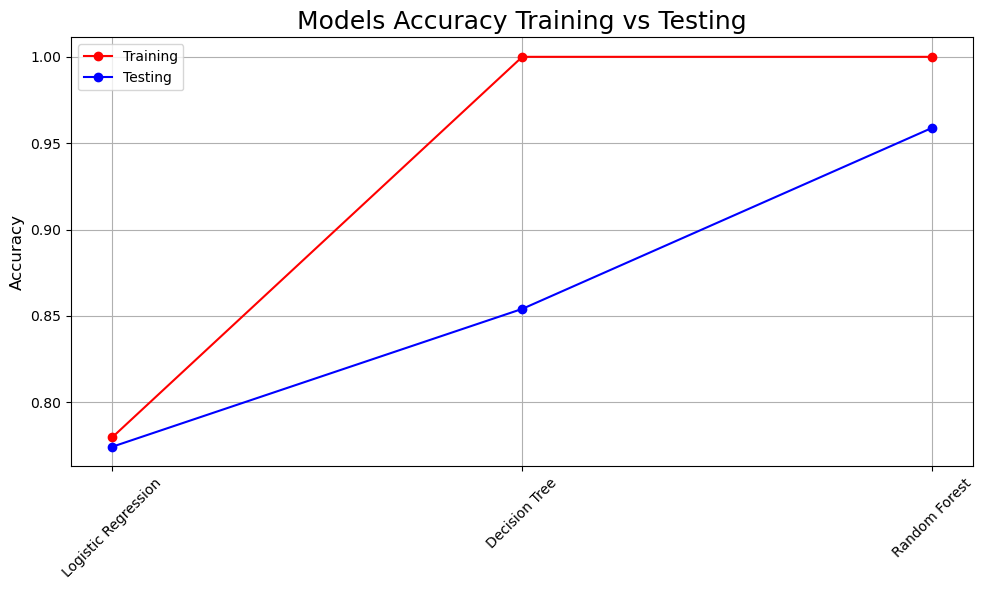

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(accuracy_models['Model'], accuracy_models['Training Accuracy'], marker='o', linestyle='-', color='red', label='Training')
plt.plot(accuracy_models['Model'], accuracy_models['Testing Accuracy'], marker='o', linestyle='-', color='blue', label='Testing')
plt.ylabel('Accuracy', fontsize=12)
plt.title('Models Accuracy Training vs Testing', fontsize=18)
plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(fontsize=10) 
plt.grid(True)
plt.tight_layout()
plt.show()

## Split test set

### Outliers

In [20]:
df_test_1[df_test_1 < 91] = 0
df_test_1[df_test_1 > 90] = 1

##### Split by sum 1

In [21]:
sum_columns = []
for i in range(0, len(df_test_1.columns), 2):
    sum_column = df_test_1.iloc[:, i] + df_test_1.iloc[:, i + 1]
    sum_columns.append(sum_column)

df_test_111 = pd.concat(sum_columns, axis=1)

##### Split by sum 2

In [22]:
sum_columns = []

for i in range(0, len(df_test_111.columns) // 2):
    sum_column = df_test_111.iloc[:, i] + df_test_111.iloc[:, i + len(df_test_111.columns) // 2]
    sum_columns.append(sum_column)

df_test_1111 = pd.concat(sum_columns, axis=1) 

In [24]:
df_test_1111[df_test_1111 > 0] = 1

##### split by cut 1

In [32]:
df_test_121 = df_test_1.iloc[:, ::2] # Shape (42000, 392)
df_test_122 = df_test_1.iloc[:, 1::2]

##### Split by cut 1.1

In [33]:
column_indexes_df1 = list(range(14)) + list(range(28, 42)) + list(range(56, 70)) + list(range(84, 98)) + list(range(112, 126))+ list(range(140, 154)) + list(range(168, 182)) + list(range(196, 210)) + list(range(224, 238)) + list(range(252, 266)) + list(range(280, 294)) + list(range(308, 322)) + list(range(336, 350)) + list(range(364, 378))# Column indexes for df1
column_indexes_df2 = list(range(14, 28)) + list(range(42, 56)) + list(range(70, 84)) + list(range(98, 112)) + list(range(126, 140)) + list(range(154, 168)) + list(range(182, 196)) + list(range(210, 224)) + list(range(238, 252)) + list(range(266, 280)) + list(range(294, 308)) + list(range(322, 336)) + list(range(350, 364)) + list(range(378, 392)) # Column indexes for df2

df_test_1211 = df_test_121.iloc[:, column_indexes_df1]
df_test_1212 = df_test_121.iloc[:, column_indexes_df2]

##### Split by cut 1.2

In [34]:
column_indexes_df1 = list(range(14)) + list(range(28, 42)) + list(range(56, 70)) + list(range(84, 98)) + list(range(112, 126))+ list(range(140, 154)) + list(range(168, 182)) + list(range(196, 210)) + list(range(224, 238)) + list(range(252, 266)) + list(range(280, 294)) + list(range(308, 322)) + list(range(336, 350)) + list(range(364, 378))# Column indexes for df1
column_indexes_df2 = list(range(14, 28)) + list(range(42, 56)) + list(range(70, 84)) + list(range(98, 112)) + list(range(126, 140)) + list(range(154, 168)) + list(range(182, 196)) + list(range(210, 224)) + list(range(238, 252)) + list(range(266, 280)) + list(range(294, 308)) + list(range(322, 336)) + list(range(350, 364)) + list(range(378, 392)) # Column indexes for df2

df_test_1221 = df_test_122.iloc[:, column_indexes_df1]
df_test_1222 = df_test_122.iloc[:, column_indexes_df2]

##### Check, remove headers

In [43]:
df_test_1211.to_csv('df_test_1211.csv', index=False)
df_test_1212.to_csv('df_test_1212.csv', index=False)
df_test_1221.to_csv('df_test_1221.csv', index=False)
df_test_1222.to_csv('df_test_1222.csv', index=False)
df_test_1111.to_csv('df_test_1111.csv', index=False)

In [44]:
df_test_1211_1 = pd.read_csv("df_test_1211_1.csv") 
df_test_1212_1 = pd.read_csv("df_test_1212_1.csv") 
df_test_1221_1 = pd.read_csv("df_test_1221_1.csv") 
df_test_1222_1 = pd.read_csv("df_test_1222_1.csv") 
df_test_1111_1 = pd.read_csv("df_test_1111_1.csv")

In [46]:
predicted_df_test_1211_1 = rf_model.predict(df_test_1211_1)

In [47]:
predicted_df_test_1212_1 = rf_model.predict(df_test_1212_1)

In [48]:
predicted_df_test_1221_1 = rf_model.predict(df_test_1221_1)

In [49]:
predicted_df_test_1222_1 = rf_model.predict(df_test_1222_1)

In [50]:
predicted_df_test_1111_1 = rf_model.predict(df_test_1111_1)

In [53]:
df_test_1211_1['Label'] = predicted_df_test_1211_1

In [56]:
df_test_1212_1['Label'] = predicted_df_test_1212_1

In [57]:
df_test_1221_1['Label'] = predicted_df_test_1221_1

In [58]:
df_test_1222_1['Label'] = predicted_df_test_1222_1

In [59]:
df_test_1111_1['Label'] = predicted_df_test_1111_1

In [60]:
df_pred_test_1211 = df_test_1211_1['Label']
df_pred_test_1212 = df_test_1212_1['Label']
df_pred_test_1221 = df_test_1221_1['Label']
df_pred_test_1222 = df_test_1222_1['Label']
df_pred_test_1111 = df_test_1111_1['Label']

In [62]:
df_pred_all = pd.concat([df_pred_test_1211, df_pred_test_1212, df_pred_test_1221, df_pred_test_1222, df_pred_test_1111], axis=1)

In [63]:
df_pred_all.head()

,Label,Label,Label,Label,Label
0,2,2,2,2,2
1,0,0,0,0,0
2,9,9,9,9,9
3,9,9,9,9,9
4,3,2,3,3,3


In [65]:
df_pred_all.to_csv('df_pred_all2.csv', index=False)

In [41]:
predicted_df_test_merged = pd.concat([df_test_1111, df_test_1211, df_test_1212, df_test_1221, df_test_1222], ignore_index=True)

In [ ]:
predicted_values = svc_model.predict(df_test)

df_test1['Label'] = predicted_values

In [19]:
df_train_1111_0.to_csv('compress_test13.csv', index=False)